# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Part 1: WeatherPy
Creating a series of scatter plots to showcase the following relationships:
* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [4]:
# set up lists to hold reponse info
city_list = []
country = []
lat = []
lng = []
max_temp =[]
humidity = []
cloudiness = []
wind_speed = []

count = 0
set_num = 1


# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city) 
        response = response.json()
        city_list.append(response['name'])
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])

        if count > 49:
            count = 0
            set_num = set_num + 1
        else:
            count = count +1   
        print(f"Processing Record {count} of Set {set_num} | {city}")
    except:
        print(f"{city} not found. Skipping...")


Processing Record 1 of Set 1 | la ronge
Processing Record 2 of Set 1 | kodinsk
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | coahuayana
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | victoria
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | tiarei
Processing Record 11 of Set 1 | karatau
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | east london
Processing Record 14 of Set 1 | albany
taolanaro not found. Skipping...
Processing Record 15 of Set 1 | vila franca do campo
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | rikitea
teneguiban not found. Skipping...
Processing Record 18 of Set 1 | ponta do sol
Processing Record 19 of Set 1 | saint-philippe
Processing Record 20 of Set 1 | tymovskoye
Processing Record 21 of Set 1 | cabedelo
Processing Record 22 of Set 1 | castro
Processing Record 2

Processing Record 33 of Set 4 | khatanga
Processing Record 34 of Set 4 | sao filipe
Processing Record 35 of Set 4 | san francisco
Processing Record 36 of Set 4 | petawawa
Processing Record 37 of Set 4 | mbandaka
Processing Record 38 of Set 4 | koshurnikovo
Processing Record 39 of Set 4 | dikson
Processing Record 40 of Set 4 | butaritari
attawapiskat not found. Skipping...
Processing Record 41 of Set 4 | puerto padre
Processing Record 42 of Set 4 | havoysund
Processing Record 43 of Set 4 | kodiak
Processing Record 44 of Set 4 | nacala
Processing Record 45 of Set 4 | tres passos
Processing Record 46 of Set 4 | walvis bay
Processing Record 47 of Set 4 | rajula
Processing Record 48 of Set 4 | bredasdorp
Processing Record 49 of Set 4 | comodoro rivadavia
Processing Record 50 of Set 4 | lucea
Processing Record 0 of Set 5 | kapaa
Processing Record 1 of Set 5 | makakilo city
Processing Record 2 of Set 5 | port hedland
Processing Record 3 of Set 5 | shieli
Processing Record 4 of Set 5 | diffa
P

Processing Record 17 of Set 8 | lamu
Processing Record 18 of Set 8 | barranca
Processing Record 19 of Set 8 | maues
Processing Record 20 of Set 8 | coihaique
Processing Record 21 of Set 8 | taixing
Processing Record 22 of Set 8 | gambela
Processing Record 23 of Set 8 | mbanza-ngungu
Processing Record 24 of Set 8 | bonavista
Processing Record 25 of Set 8 | ryotsu
karaul not found. Skipping...
vestbygda not found. Skipping...
Processing Record 26 of Set 8 | college
saleaula not found. Skipping...
Processing Record 27 of Set 8 | mehamn
Processing Record 28 of Set 8 | sinazongwe
Processing Record 29 of Set 8 | rafaela
Processing Record 30 of Set 8 | adrar
Processing Record 31 of Set 8 | nome
Processing Record 32 of Set 8 | ossora
ahumada not found. Skipping...
Processing Record 33 of Set 8 | kutum
Processing Record 34 of Set 8 | gazli
Processing Record 35 of Set 8 | iwanai
Processing Record 36 of Set 8 | kalmunai
Processing Record 37 of Set 8 | cairns
Processing Record 38 of Set 8 | medvez

Processing Record 46 of Set 11 | puerto colombia


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create dictionary to pass into DataFrame
city_dict = {
    'city_name': city_list,
    'country':country,
    'latitude': lat,
    'longitude': lng,
    'max_temperature': max_temp,
    'humidity': humidity,
    'cloudiness': cloudiness,
    'wind speed': wind_speed,
}

# # # # create DataFrame from dictionary
city_df = pd.DataFrame(city_dict)
city_df

,city_name,country,latitude,longitude,max_temperature,humidity,cloudiness,wind speed
0,La Ronge,CA,55.1001,-105.2842,0.25,74,100,3.64
1,Kodinsk,RU,58.6881,99.1844,-1.65,89,99,2.75
2,Port Alfred,ZA,-33.5906,26.8910,13.99,76,100,2.68
3,Coahuayana Viejo,MX,18.7333,-103.6833,24.17,66,41,1.85
4,Ushuaia,AR,-54.8000,-68.3000,2.23,88,60,1.36
...,...,...,...,...,...,...,...,...
551,Pozoblanco,ES,38.3791,-4.8483,6.89,77,13,0.67
552,Alaşehir,TR,38.3508,28.5172,15.53,53,62,1.39
553,Liangxiang,CN,39.7319,116.1400,19.91,48,100,2.03
554,Nagayo,JP,32.8242,129.8861,17.64,100,75,2.57


In [6]:
city_df.to_csv('WeatherPy_outputs\city_df.csv', index=False)

In [7]:
city_df.count()

city_name          556
country            556
latitude           556
longitude          556
max_temperature    556
humidity           556
cloudiness         556
wind speed         556
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# Create a clean DataFrame by dropping the cities where humidity > 100%
city_clean = city_df.loc[city_df['humidity'] <= 100, :]
city_clean.head()
city_clean.count()

city_name          556
country            556
latitude           556
longitude          556
max_temperature    556
humidity           556
cloudiness         556
wind speed         556
dtype: int64

In [9]:
#  Get the indices of cities that have humidity over 100%.
#skip this step if no cities are over 100%

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

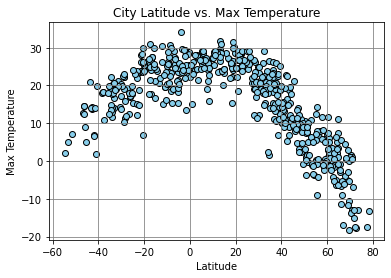

In [11]:
plt.scatter(city_clean["latitude"],city_clean["max_temperature"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("WeatherPy_outputs\lat_temp.png")
plt.show()

The graph shows that cities located closer to the equator do tend to have higher maximum temperatures. Interestingly, cities that are located eith +20 degrees or -20 degrees tend to have similar maximum temperatures as the equator. 

## Latitude vs. Humidity Plot

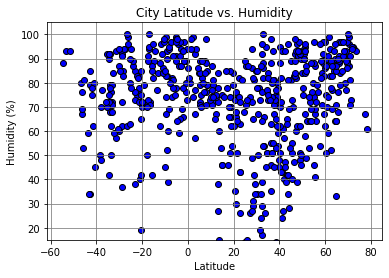

In [12]:
plt.scatter(city_clean["latitude"],city_clean["humidity"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("WeatherPy_outputs\lat_humidity.png")
plt.show()

There is not a linear relationship between humidity and latitude. However, cities that are more than 60 degrees latitude have corresponding humidity levels of >= 50%, with a majority above 80% humidity. Of all cities in the sample population, a majority have humidity levels at least 50% or more. 

## Latitude vs. Cloudiness Plot

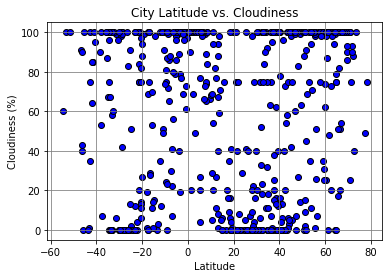

In [13]:
plt.scatter(city_clean["latitude"],city_clean["cloudiness"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("WeatherPy_outputs\lat_cloudiness.png")
plt.show()

There is not a linear relationship between cloudiness and latitude.However, this is a large proportion of cities with cloudiness at 0% along -30 to -20 degrees latitude and 10 to 40 degrees latitude. There is also a large proportion of cities with cloudiness at 100% along -10 to 10 degrees latitude and 35 to 70 degrees latitude.

## Latitude vs. Wind Speed Plot

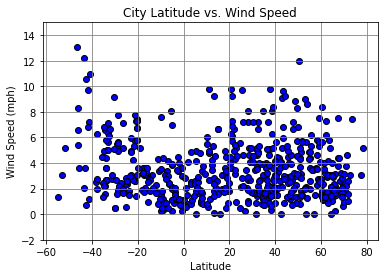

In [14]:
plt.scatter(city_clean["latitude"],city_clean["wind speed"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,15)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("WeatherPy_outputs\lat_windspeed.png")
plt.show()

There is not a linear relationship between wind speed and latitude. The data is more clustered around 1-2 mph windspeed across cities at different latitudes. 

## Linear Regression

In [15]:
#separate data into only northern hemisphere
# Create a northern hemisphere DataFrame by only including cities where latitude >= 0 degrees
northern_hem = city_clean.loc[city_clean['latitude'] > 0, :]
#northern_hem

In [16]:
#separate data into only northern hemisphere
# Create a northern hemisphere DataFrame by only including cities where latitude < 0 degrees
southern_hem = city_clean.loc[city_clean['latitude'] < 0, :]
#southern_hem

In [17]:
#create a function
def plot_lin_reg(x_val,y_val,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_val,y_val)
    regress_values = x_val * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_val,y_val)
    plt.plot(x_val, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {str(round(rvalue,3))}") 
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.888


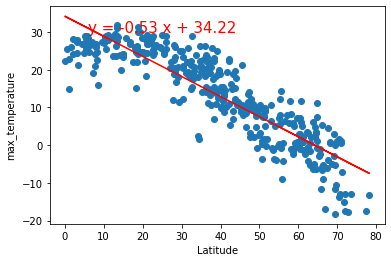

In [18]:
x_val = northern_hem["latitude"]
y_val = northern_hem["max_temperature"]
plot_lin_reg(x_val,y_val,'max_temperature', (6,30))

There is a negative sloped relationship between max temperature and city latitude in the northern hemisphere, where the higher the latitude, the lower the maximum temperature. The r squared value indicates that the relationship between max tempearture and city latitude is quite strong. This graph confirms the established expectation that cities closer to the equator tend to be hotter, and cities farther from the equator tend to be colder.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.226


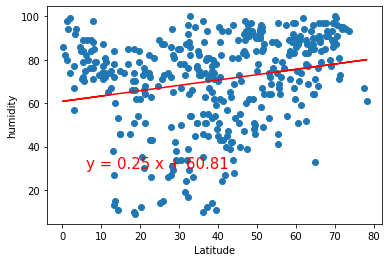

In [19]:
x_val = northern_hem["latitude"]
y_val = northern_hem["humidity"]
plot_lin_reg(x_val,y_val,'humidity', (6,30))

There is a weak positive relationship between humidity and city latitude in the northern hemisphere. The weak relationship is confirmed with a small r-squared value.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.683


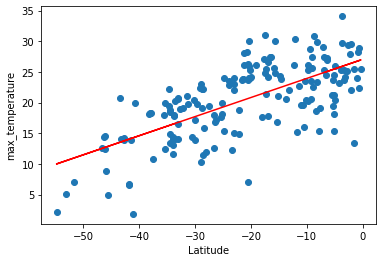

In [20]:
x_val = southern_hem["latitude"]
y_val = southern_hem["max_temperature"]
plot_lin_reg(x_val,y_val,'max_temperature', (6,30))

There is a postive relationships between maximum temperature and latitude in the southern hemsiphere, where latitude closer to 0 degrees, or the equator, generally show a higher max city temperature. The r-squared value indicates that the relationship between max temperature and latitude is relatively strong. Additionally, the data reinforces the idea that cities tend to be warmer closer to the equator and colder further away.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.248


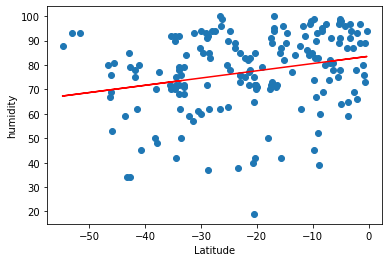

In [21]:
x_val = southern_hem["latitude"]
y_val = southern_hem["humidity"]
plot_lin_reg(x_val,y_val,'humidity', (6,30))

There is a weak positive relationship between humidity and latitude in the Southern Hemisphere, however, the data is widely dispersed.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.265


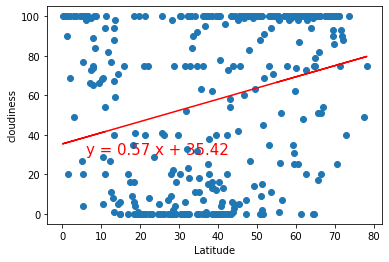

In [22]:
x_val = northern_hem["latitude"]
y_val = northern_hem["cloudiness"]
plot_lin_reg(x_val,y_val,'cloudiness', (6,30))

There is a weak positive relationship between cloudiness and latitude in the northern hemisphere. The weak relationship is confirmed with a small r-squared value. However, many data points are clustered at 0% cloudiness or 100% cloudiness at varying latitudes.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.106


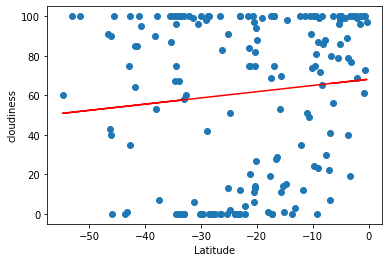

In [23]:
x_val = southern_hem["latitude"]
y_val = southern_hem["cloudiness"]
plot_lin_reg(x_val,y_val,'cloudiness', (6,30))

There is no significant relationship between cloudiness and latitude in the southern hemisphere. However, many data points are clustered at 0% cloudiness or 100% cloudiness at varying latitudes.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.008


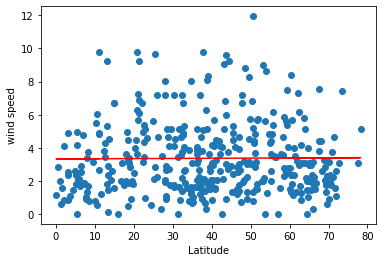

In [24]:
x_val = northern_hem["latitude"]
y_val = northern_hem["wind speed"]
plot_lin_reg(x_val,y_val,'wind speed', (6,30))

There is no significant relationship between wind speed and latitude in the northern hemisphere. The sample shows all windspeeds extracted were <12 mph.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.453


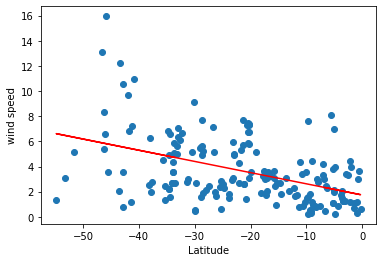

In [25]:
x_val = southern_hem["latitude"]
y_val = southern_hem["wind speed"]
plot_lin_reg(x_val,y_val,'wind speed', (6,30))

There is a weak negative correlation between wind speed and latitude in the southern hemisphere. This is confirmed with the r-squared value shown above. Although the correlation is weak, it is stronger than the correlation between wind speed and latitude in the northern hemisphere.